In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

# Data

Training data shape :  (108925, 32, 24) (108925, 1)
Testing data shape :  (27232, 32, 24) (27232, 1)
Total number of outputs :  11
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10]


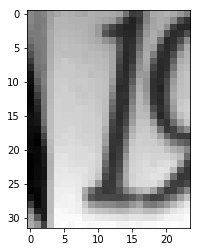

In [2]:
X = np.load('X.p')
y = np.load('y.p')
tt_ratio = .8
train_size = int(X.shape[0] * tt_ratio)
train_images, train_labels = X[:train_size], y[:train_size]
test_images, test_labels = X[train_size:], y[train_size:]
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.imshow(train_images[0,:,:], cmap='gray')

In [3]:
# shape
nRows,nCols = train_images.shape[1:]
nDims = 1
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)
input_shape

(32, 24, 1)

In [4]:
# one-hot encode
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
train_labels[:5], train_labels_one_hot[:5]

(array([[ 1],
        [ 9],
        [10],
        [10],
        [ 2]]), array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))

# Model

In [5]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [6]:
model1 = createModel()
batch_size = 1024
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 24, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 22, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 9, 64)         36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 4, 64)          0         
__________

In [7]:
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Train

In [8]:
history = model1.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              verbose=1)
# history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
#                    validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/100
107/107 [==============================] - 12s 116ms/step - loss: 1.9734 - acc: 0.4593 - val_loss: 2.1551 - val_acc: 0.4634
Epoch 2/100
107/107 [==============================] - 12s 108ms/step - loss: 1.9321 - acc: 0.4629 - val_loss: 1.8228 - val_acc: 0.4634
Epoch 3/100
107/107 [==============================] - 12s 108ms/step - loss: 1.6898 - acc: 0.4843 - val_loss: 1.4037 - val_acc: 0.5373
Epoch 4/100
107/107 [==============================] - 11s 106ms/step - loss: 1.5242 - acc: 0.5204 - val_loss: 1.4817 - val_acc: 0.5921
Epoch 5/100
107/107 [==============================] - 12s 107ms/step - loss: 1.3693 - acc: 0.5645 - val_loss: 1.0724 - val_acc: 0.6781
Epoch 6/100
107/107 [==============================] - 11s 106ms/step - loss: 1.2358 - acc: 0.6081 - val_loss: 0.8578 - val_acc: 0.7418
Epoch 7/100
107/107 [==============================] - 11s 107ms/step - loss: 1.0825 - acc: 0.6611 - val_loss: 0.8586 - val_acc: 0.7382
Epoch 8/100
107/107 [===========================

Epoch 61/100
107/107 [==============================] - 12s 108ms/step - loss: 0.2860 - acc: 0.9191 - val_loss: 0.1932 - val_acc: 0.9466
Epoch 62/100
107/107 [==============================] - 12s 109ms/step - loss: 0.2805 - acc: 0.9196 - val_loss: 0.2115 - val_acc: 0.9403
Epoch 63/100
107/107 [==============================] - 11s 107ms/step - loss: 0.2782 - acc: 0.9202 - val_loss: 0.1916 - val_acc: 0.9474
Epoch 64/100
107/107 [==============================] - 11s 107ms/step - loss: 0.2781 - acc: 0.9201 - val_loss: 0.1902 - val_acc: 0.9476
Epoch 65/100
107/107 [==============================] - 12s 108ms/step - loss: 0.2778 - acc: 0.9210 - val_loss: 0.1916 - val_acc: 0.9473
Epoch 66/100
107/107 [==============================] - 11s 107ms/step - loss: 0.2777 - acc: 0.9211 - val_loss: 0.2023 - val_acc: 0.9435
Epoch 67/100
107/107 [==============================] - 12s 108ms/step - loss: 0.2759 - acc: 0.9209 - val_loss: 0.1905 - val_acc: 0.9481
Epoch 68/100
107/107 [===================

[0.17787188413341176, 0.9516377790834313]

In [9]:
test_labels_pred = model1.predict(test_data).argmax(axis=1)
test_labels_pred

array([10,  2,  7, ...,  9, 10,  3])

# Curves

Text(0.5,1,'Loss Curves')

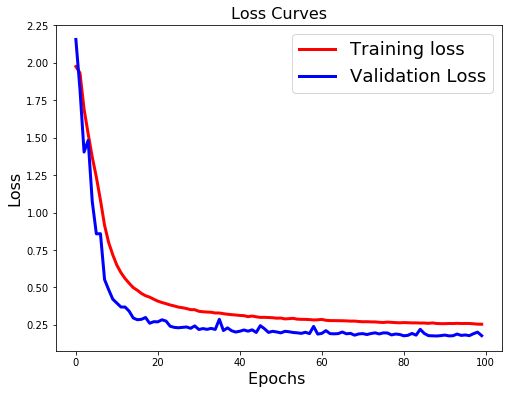

In [10]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

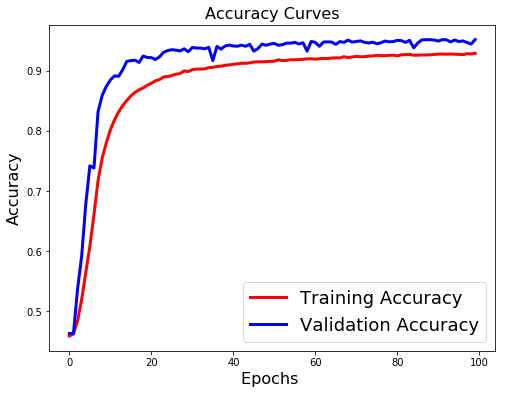

In [11]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Confusion matrix

Normalized confusion matrix


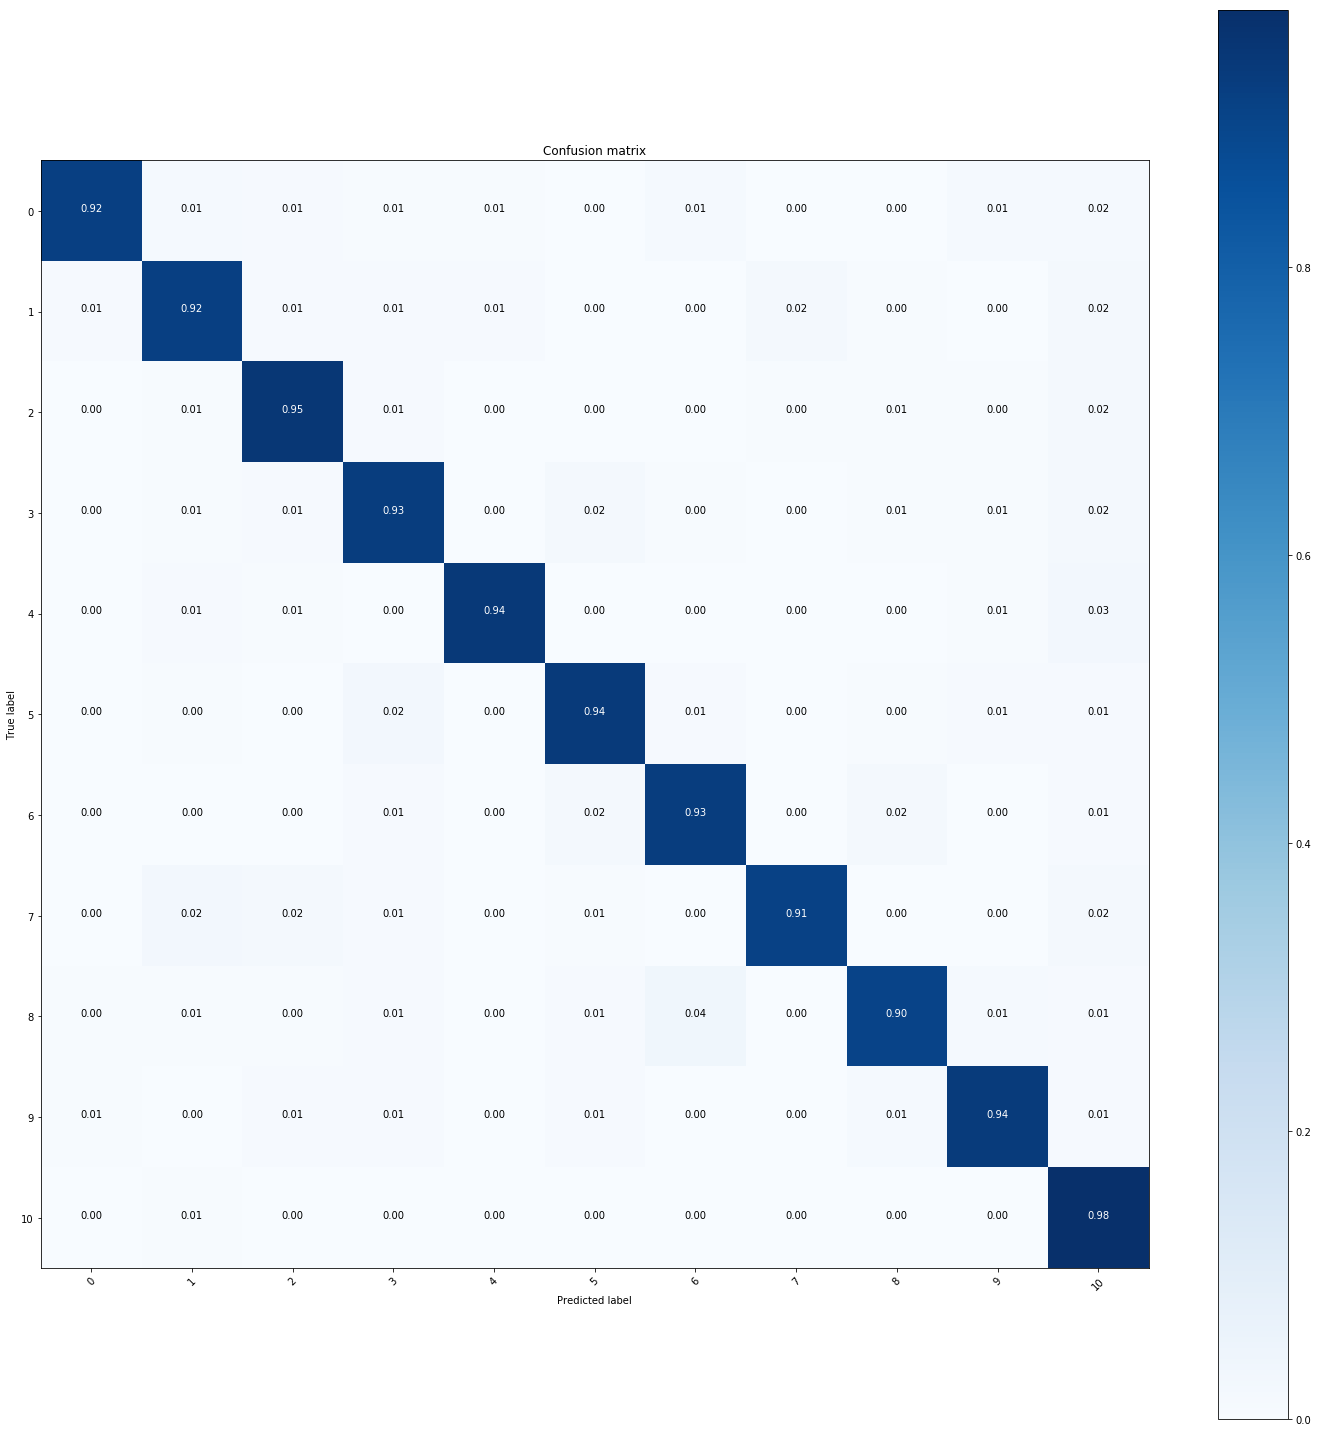

In [12]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cm = confusion_matrix(test_labels, test_labels_pred)

plt.rcParams['figure.figsize'] = (20.0, 20.0)
plot_confusion_matrix(cm, classes, normalize=True)

# Save model

In [13]:
model1.save('model1.h5')